**WeatherPy Analysis**

*Analysis*
#Observed Trend 1 - Based on the Latitude vs. Max Temp Plot, we can see that the cities that are closer to Latitude 0 experience hotter temperatures.
#Observed Trend 2 - Based on the Latitude vs. Humidity % Plot, we can see that the cities that near Latitude 0 have higher humidity% but not as high as cities between 40 to 80 Degree. 
#Observed Trend 3 - Windspeed is between 0-10 mph across Latitude. Cloudiness % also doesn't show a correlation between being closer or further to the equator.

In [1]:
#Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import time
import json

from api_keys import api_key

from citipy import citipy


output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

**Generate City List**

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [3]:
print(cities)

['leh', 'bonfim', 'longyearbyen', 'barrow', 'jamestown', 'port elizabeth', 'puerto ayora', 'punta arenas', 'cape town', 'ushuaia', 'bacolod', 'balabac', 'taolanaro', 'ternate', 'thompson', 'havelock', 'coihaique', 'lincoln', 'tres picos', 'wampusirpi', 'walvis bay', 'mahebourg', 'dongsheng', 'khandyga', 'norman wells', 'pisco', 'bredasdorp', 'hobart', 'sitka', 'bluff', 'upernavik', 'mapiri', 'cowra', 'puerto penasco', 'lorengau', 'guaymas', 'nizhneyansk', 'te anau', 'acapulco', 'kodiak', 'iqaluit', 'nikolskoye', 'arraial do cabo', 'camacha', 'rock springs', 'lamu', 'olinda', 'aklavik', 'san patricio', 'vaitupu', 'san quintin', 'nelson bay', 'mataura', 'avarua', 'new norfolk', 'marcona', 'severo-kurilsk', 'pevek', 'rikitea', 'dawson creek', 'albany', 'bur gabo', 'porterville', 'yelan-koleno', 'grindavik', 'indiaroba', 'nome', 'sentyabrskiy', 'busselton', 'ilulissat', 'gulshat', 'mujiayingzi', 'samusu', 'abu samrah', 'san pedro', 'saryshagan', 'cidreira', 'port alfred', 'velikooktyabrski

**Perform API Calls**

In [4]:
baseurl =  "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{baseurl}APPID={api_key}&units={units}&q="
query_url
    

'http://api.openweathermap.org/data/2.5/weather?APPID=acbebda3aee13b472e1d76edc75f5228&units=imperial&q='

In [5]:
#Process Data Information 
print('Beginning Data Retrieval')
print('---------------------------')
##Create List to hold data
recordcount = 0
clouds = []
country=[]
humidity=[]
lat=[]
lng=[]
maxtemp=[]
windspeed=[]
dt=[]
newcity=[]

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        clouds.append(response['clouds']['all'])
        country.append(response["sys"]["country"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        windspeed.append(response["wind"]["speed"])
        dt.append(response["dt"])
        newcity.append(response["name"])
        recordcount +=1
        print(f'Processing Record {recordcount}:| {city} | {query_url + city}')
    except(KeyError):
        print(f'City not found.Skipping...')

print('---------------------------')
print('Data Retreival Complete')
print('---------------------------')

Beginning Data Retrieval
---------------------------
Processing Record 1:| leh | http://api.openweathermap.org/data/2.5/weather?APPID=acbebda3aee13b472e1d76edc75f5228&units=imperial&q=leh
Processing Record 2:| bonfim | http://api.openweathermap.org/data/2.5/weather?APPID=acbebda3aee13b472e1d76edc75f5228&units=imperial&q=bonfim
Processing Record 3:| longyearbyen | http://api.openweathermap.org/data/2.5/weather?APPID=acbebda3aee13b472e1d76edc75f5228&units=imperial&q=longyearbyen
Processing Record 4:| barrow | http://api.openweathermap.org/data/2.5/weather?APPID=acbebda3aee13b472e1d76edc75f5228&units=imperial&q=barrow
Processing Record 5:| jamestown | http://api.openweathermap.org/data/2.5/weather?APPID=acbebda3aee13b472e1d76edc75f5228&units=imperial&q=jamestown
Processing Record 6:| port elizabeth | http://api.openweathermap.org/data/2.5/weather?APPID=acbebda3aee13b472e1d76edc75f5228&units=imperial&q=port elizabeth
Processing Record 7:| puerto ayora | http://api.openweathermap.org/data/2

In [6]:
citydata = {
    "newcity": newcity,
    "clouds": clouds,
    "country": country, 
    "humidity": humidity,
    "lat": lat,
    "lng": lng,
    "maxtemp": maxtemp,
    "windspeed": windspeed
}

citydatadf = pd.DataFrame(citydata)
citydatadf.head()

,newcity,clouds,country,humidity,lat,lng,maxtemp,windspeed
0,Leh,0,IN,42,34.16,77.58,31.24,0.81
1,Bonfim,55,GY,61,3.36,-59.84,82.45,6.31
2,Longyearbyen,40,NO,67,78.22,15.63,19.40,6.93
3,Barrow,46,AR,97,-38.31,-60.23,45.68,6.82
4,Jamestown,0,AU,11,-33.21,138.60,84.81,8.34


In [16]:
##Save to csv
citydatadf.to_csv('citydata.csv')

**Latitude vs Temperature Plot**

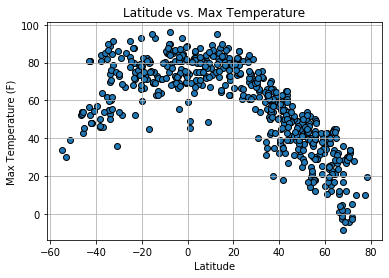

In [15]:
# Build a scatter plot
plt.scatter(citydata["lat"], citydata["maxtemp"], marker="o", edgecolor="black")

plt.title("Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude vs. Max Temperature.png")

plt.show()

**Latitude vs. Cloudiness Plot**

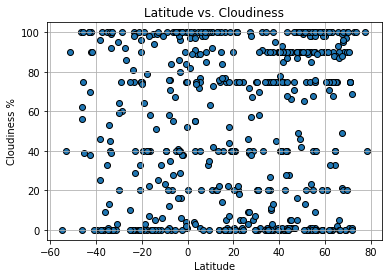

In [14]:
# Build a scatter plot
plt.scatter(citydata["lat"], citydata["clouds"], marker="o",edgecolor="black")

plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude vs. Cloudiness.png")

plt.show()

**Latitude vs. Wind Speed Plot**

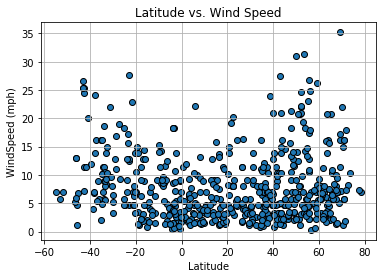

In [17]:
# Build a scatter plot
plt.scatter(citydata["lat"], citydata["windspeed"], marker="o",edgecolor="black" )

plt.title("Latitude vs. Wind Speed")
plt.ylabel("WindSpeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude vs. Windspeed.png")

plt.show()

**Latitude vs. Humidity**

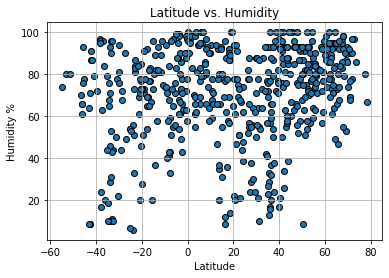

In [18]:
# Build a scatter plot
plt.scatter(citydata["lat"], citydata["humidity"], marker="o",edgecolor="black")

plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude vs. Humidity.png")

plt.show()